In [ ]:
import csv
import time
import numpy as np
import copy
import math
from math import inf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def cities_dist(d,i,j):
    '''
    This functionsfinds distance between two cities
    
    Inputs: 
            i,j: cities number
            
    Outputs:
            dist: distance between cities i and j
    '''
    
    i_x = d[i-1][1]
    i_y = d[i-1][2] 
    j_x = d[j-1][1]
    j_y = d[j-1][2]
    
    dist = math.sqrt((i_x-j_x)**2 + (i_y-j_y)**2)
    
    return dist

In [ ]:
def plot_TSP(Cities,G):
    
    '''
    This function plots all cities visited in orders in TSP problem and reports the total distance
    of the tour in TSP problem
    
    Inputs:
            Cities: a list of all cities ordered from last to 1 which are visited.
            
    Outputs:
            a plot of the path traveled between cities with the length of each edge.
            
            tot_dist: the total distance of the tour in TSP problem.
    
    '''
    tot_dist = 0
    plt.figure(figsize=(15,10))
    for i in range(len(Cities)-1):
        first_point = Cities[i]
        second_point = Cities[i+1]
        
        first_point_x = G[first_point-1][1]
        first_point_y = G[first_point-1][2]
        
        second_point_x = G[second_point-1][1]
        second_point_y = G[second_point-1][2]
        
        x_values = [first_point_x, second_point_x]
        y_values = [first_point_y, second_point_y]
        
        plt.plot(x_values, y_values)
        plt.text(first_point_x, first_point_y, str(first_point))
        
        # distance between first_point and second_point
        dist = cities_dist(G,first_point,second_point)
        # puting distance as a text on the middle of the edge
        mid_x = 0.5 * (first_point_x+second_point_x)
        mid_y = 0.5 * (first_point_y+second_point_y)
        plt.text(mid_x, mid_y, str(round(dist,2)), color='green')
        tot_dist += dist # to check total travel distance
    
    
    # to draw last edge (from last vortex to 1)
    first_point = Cities[-1]
    second_point = Cities[0]
    first_point_x = d[first_point-1][1]
    first_point_y = d[first_point-1][2]

    second_point_x = G[second_point-1][1]
    second_point_y = G[second_point-1][2]

    x_values = [first_point_x, second_point_x]
    y_values = [first_point_y, second_point_y]

    plt.plot(x_values, y_values)
    plt.text(first_point_x, first_point_y, str(first_point))

    # distance between first_point and second_point
    dist = cities_dist(G,first_point,second_point)
    # puting distance as a text on the middle of the edge
    mid_x = 0.5 * (first_point_x+second_point_x)
    mid_y = 0.5 * (first_point_y+second_point_y)
    plt.text(mid_x, mid_y, str(round(dist,2)), color='green')
    tot_dist += dist # to check total travel distance
    
    return tot_dist

In [4]:
def tsp_heuristic(d):
    
    n = len(d)
    first_city = d[0][0] # city 1 if d is sorted based on cities numbers
    remained_cities = copy.deepcopy(d)
    remained_cities.remove(d[0])
    current_city = first_city
    total_travel_length = 0
    tsp = [current_city]


    while len(remained_cities) > 0:
        min_value = inf
        for i in remained_cities:
            city_distance = cities_dist(d,current_city,i[0])
            if city_distance < min_value:
                min_value = city_distance
                closest_city = i[0] # closest city number
                
        total_travel_length +=  min_value
        tsp.append(closest_city)
        remained_cities.remove(d[closest_city-1]) # remove closest city from remanied_cities
        current_city= closest_city # current city number for the next iteration
        progress = round((n-len(remained_cities))/n * 100,2)
        print('progeress (%): {}'.format(progress))
        clear_output(wait=True)
        
    tsp.append(first_city)
    city_distance = cities_dist(d,closest_city,first_city)
    total_travel_length += city_distance
    
    return tsp, total_travel_length

### Examples

############    tsp_heuristic without x trick   ############
############################################################
############################################################

 __________Total travel length is:________________
15.23606797749979

 __________Visited cities in order (from city 1) is:________________
[1, 3, 2, 5, 6, 4, 1]

 ______The shortest tour to travel has length of (from the figure to double check):_________
15.23606797749979

 --- 0.019946575164794922 seconds ---


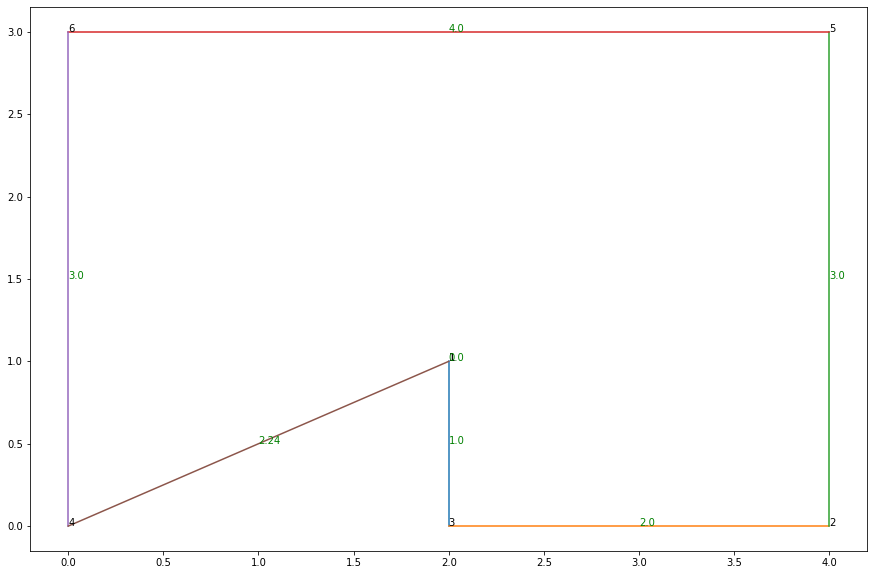

In [8]:
# reading the input file as a list
with open('Test_01_15.24.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[int(i[0]),float(i[1]),float(i[2])] for i in d] # convert d into integers

start_time = time.time()
tsp, total_travel_length = tsp_heuristic(d)
print('############    tsp_heuristic without x trick   ############')
print('############################################################')
print('############################################################')
print('\n __________Total travel length is:________________')
print(total_travel_length)
print('\n __________Visited cities in order (from city 1) is:________________')
print(tsp)
print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
tot_dist = plot_TSP(tsp,d)
print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))

In [9]:
# reading the input file as a list
with open('nn.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)

n  = int(d[0][0]) # n is number of cities
d.pop(0)

d = [[int(i[0]),float(i[1]),float(i[2])] for i in d] # convert d into integers

start_time = time.time()
tsp, total_travel_length = tsp_heuristic(d)
print('############    tsp_heuristic without x trick   ############')
print('############################################################')
print('############################################################')
print('\n __________Total travel length is:________________')
print(total_travel_length)
# print('\n __________Visited cities in order (from city 1) is:________________')
# print(tsp)
# print('\n ______The shortest tour to travel has length of (from the figure to double check):_________')
# tot_dist = plot_TSP(tsp,d)
# print(tot_dist)

print("\n --- %s seconds ---" % (time.time() - start_time))

############    tsp_heuristic without x trick   ############
############################################################
############################################################

 __________Total travel length is:________________
1203406.5012708856

 --- 439.8239834308624 seconds ---
